### Code

#### Sentiment Anlysis:
1. TextBlob
2. VADER
3. BERT
4. OpenAI

- Overall Analysis over the 10 years
- Individual Tycoon Analysis over 10 years

In [26]:
import requests  ## for getting data from a server GET
import re   ## for regular expressions
import pandas as pd    ## for dataframes and related
from pandas import DataFrame

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


from sklearn.model_selection import train_test_split
import random as rd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
#from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
#import graphviz  ##Couldn't load the library

from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn
from sklearn.cluster import KMeans

from sklearn import preprocessing

import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram

import numpy as np
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

## Reading the csv gathered from gardian API

In [4]:
all_data = pd.read_csv("/content/sample_data/guardian_articles (1).csv")

In [36]:
all_data.shape

(2900, 5)

In [8]:
print(all_data)

            keyword                                           headline  \
0         Elon Musk  Why would Elon Musk want to deliberately destr...   
1         Elon Musk  Neil Young boycotts X over antisemitic Elon Mu...   
2         Elon Musk  Elon Musk spends $100m to open new university ...   
3         Elon Musk  Elon Musk visits scene of kibbutz massacre wit...   
4         Elon Musk  Elon Musk hurls defiant, profanity-laced retor...   
...             ...                                                ...   
2895  Larry Ellison  CSIRO chief’s exit offers Labor rare opportuni...   
2896  Larry Ellison  Pandora’s Box by Peter Biskind review – essent...   
2897  Larry Ellison  Over the top: how to liven up soup | Kitchen aide   
2898  Larry Ellison  Global giants gear up to build streaming model...   
2899  Larry Ellison  FTX assets worth $3.5bn held by Bahamas securi...   

                                                    url      publication_date  
0     https://www.theguardian.c

## 1. TextBlob

In [ ]:
pip install textblob


Now generating sentiment labels using TextBlob.

In [9]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    # Create a TextBlob object
    analysis = TextBlob(text)
    # Polarity is within the range [-1, 1]
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the headline column
all_data['Sentiment'] = all_data['headline'].apply(get_sentiment)

print(all_data[['headline', 'Sentiment']])

                                               headline Sentiment
0     Why would Elon Musk want to deliberately destr...  Negative
1     Neil Young boycotts X over antisemitic Elon Mu...  Positive
2     Elon Musk spends $100m to open new university ...  Positive
3     Elon Musk visits scene of kibbutz massacre wit...   Neutral
4     Elon Musk hurls defiant, profanity-laced retor...   Neutral
...                                                 ...       ...
2895  CSIRO chief’s exit offers Labor rare opportuni...  Positive
2896  Pandora’s Box by Peter Biskind review – essent...   Neutral
2897  Over the top: how to liven up soup | Kitchen aide  Positive
2898  Global giants gear up to build streaming model...   Neutral
2899  FTX assets worth $3.5bn held by Bahamas securi...  Positive

[2900 rows x 2 columns]


## Data preprocessing and splitting


In [22]:

# Apply the function to the headline column
all_data['Sentiment'] = all_data['headline'].apply(get_sentiment)

# Print the headlines with their sentiment labels
print(all_data[['headline', 'Sentiment']].head())

# Tokenize and preprocess text data
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(all_data['headline'])
sequences = tokenizer.texts_to_sequences(all_data['headline'])
padded_sequences = pad_sequences(sequences, padding='post', maxlen=20)

# Print tokenized sequences and padded data
print("\nTokenized Sequences (first 5 samples):")
print(sequences[:5])  # Printing first 5 sequences before padding
print("\nPadded Sequences (first 5 samples):")
print(padded_sequences[:5])  # Padded sequences

# Convert sentiment labels to one-hot encoding
encoder = LabelEncoder()
labels = encoder.fit_transform(all_data['Sentiment'])
labels = np.array(pd.get_dummies(labels))

# Print label encoding
print("\nEncoded Labels (first 5 samples):")
print(labels[:5])  # Printing first 5 encoded labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("\nTraining and Test Sets:")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

# Print first few examples of the training data
print("\nX_train (first 5 samples):")
print(X_train[:5])

print("\ny_train (first 5 samples):")
print(y_train[:5])

                                            headline Sentiment
0  Why would Elon Musk want to deliberately destr...  Negative
1  Neil Young boycotts X over antisemitic Elon Mu...  Positive
2  Elon Musk spends $100m to open new university ...  Positive
3  Elon Musk visits scene of kibbutz massacre wit...   Neutral
4  Elon Musk hurls defiant, profanity-laced retor...   Neutral

Tokenized Sequences (first 5 samples):
[[40, 187, 7, 9, 146, 2, 2249, 1284, 69, 90, 91], [3594, 436, 3595, 69, 23, 867, 7, 9, 255], [7, 9, 3596, 868, 2, 657, 36, 2250, 6, 398], [7, 9, 2251, 3597, 4, 3598, 2252, 17, 1285, 658], [7, 9, 3599, 2253, 3600, 3601, 3602, 26, 3603, 869]]

Padded Sequences (first 5 samples):
[[  40  187    7    9  146    2 2249 1284   69   90   91    0    0    0
     0    0    0    0    0    0]
 [3594  436 3595   69   23  867    7    9  255    0    0    0    0    0
     0    0    0    0    0    0]
 [   7    9 3596  868    2  657   36 2250    6  398    0    0    0    0
     0    0    0    0 

# Buinding Models

## Using Simple Artificial Neural Network

In [28]:
from tensorflow.keras.layers import GlobalAveragePooling1D

# Build the model
model_nn = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=20),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # Output layer: one neuron per class
])

model_nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_nn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model_nn.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

print("\nModel Summary - NN:")
model_nn.summary()

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4799 - loss: 1.0745 - val_accuracy: 0.5086 - val_loss: 1.0083
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5056 - loss: 1.0023 - val_accuracy: 0.5086 - val_loss: 0.9999
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5319 - loss: 0.9730 - val_accuracy: 0.5328 - val_loss: 0.9863
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5433 - loss: 0.9477 - val_accuracy: 0.5483 - val_loss: 0.9622
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6129 - loss: 0.8804 - val_accuracy: 0.5621 - val_loss: 0.9285
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6902 - loss: 0.7754 - val_accuracy: 0.6172 - val_loss: 0.8845
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7541 - loss: 0.6448 - val_accuracy: 0.6293 - val_loss: 0.8479
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7996 - loss: 0.5389 - val_accuracy: 0.6431 - val_loss:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 20, 16)              │          80,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 16)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 240,971 (941.30 KB)

 Trainable params: 80,323 (313.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,648 (627.54 KB)

## Using CNN

In [29]:

# Build the CNN model
model = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=20),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(pool_size=4),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Output layer: one neuron per class
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

print("\nModel Summary - NN:")
model.summary()


Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5178 - loss: 1.0382 - val_accuracy: 0.5086 - val_loss: 1.0161
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5147 - loss: 0.9952 - val_accuracy: 0.5586 - val_loss: 0.9552
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6642 - loss: 0.7814 - val_accuracy: 0.6810 - val_loss: 0.7830
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8137 - loss: 0.4195 - val_accuracy: 0.6810 - val_loss: 0.8596
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9234 - loss: 0.2623 - val_accuracy: 0.6534 - val_loss: 0.9803
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9629 - loss: 0.1544 - val_accuracy: 0.6552 - val_loss: 1.1351
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9867 - loss: 0.0750 - val_accuracy: 0.6534 - val_loss: 1.2772
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9978 - loss: 0.0296 - val_accuracy: 0.6414 - val_loss:

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 20, 16)              │          80,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 16, 64)              │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 268,619 (1.02 MB)

 Trainable params: 89,539 (349.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 179,080 (699.54 KB)

### Using LSTM

In [30]:
# Build the model
model_lstm = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=20),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(24, activation='relu'),
    Dense(3, activation='softmax')  # Output layer: one neuron per class
])

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_lstm.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model_lstm.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

print("\nModel Summary - NN:")
model_lstm.summary()

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.4952 - loss: 1.0500 - val_accuracy: 0.5086 - val_loss: 0.9950
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6071 - loss: 0.8749 - val_accuracy: 0.5776 - val_loss: 0.9306
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7595 - loss: 0.5157 - val_accuracy: 0.6103 - val_loss: 1.0992
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8211 - loss: 0.3706 - val_accuracy: 0.5931 - val_loss: 1.1621
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8903 - loss: 0.2738 - val_accuracy: 0.5828 - val_loss: 1.4059
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9435 - loss: 0.1786 - val_accuracy: 0.5948 - val_loss: 1.6154
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9593 - loss: 0.1315 - val_accuracy: 0.5948 - val_loss: 1.6805
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9710 - loss: 0.0848 - val_accuracy: 0.5638 - v

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 20, 16)              │          80,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 20, 64)              │          20,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 24)                  │             792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              75 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 342,059 (1.30 MB)

 Trainable params: 114,019 (445.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 228,040 (890.79 KB)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


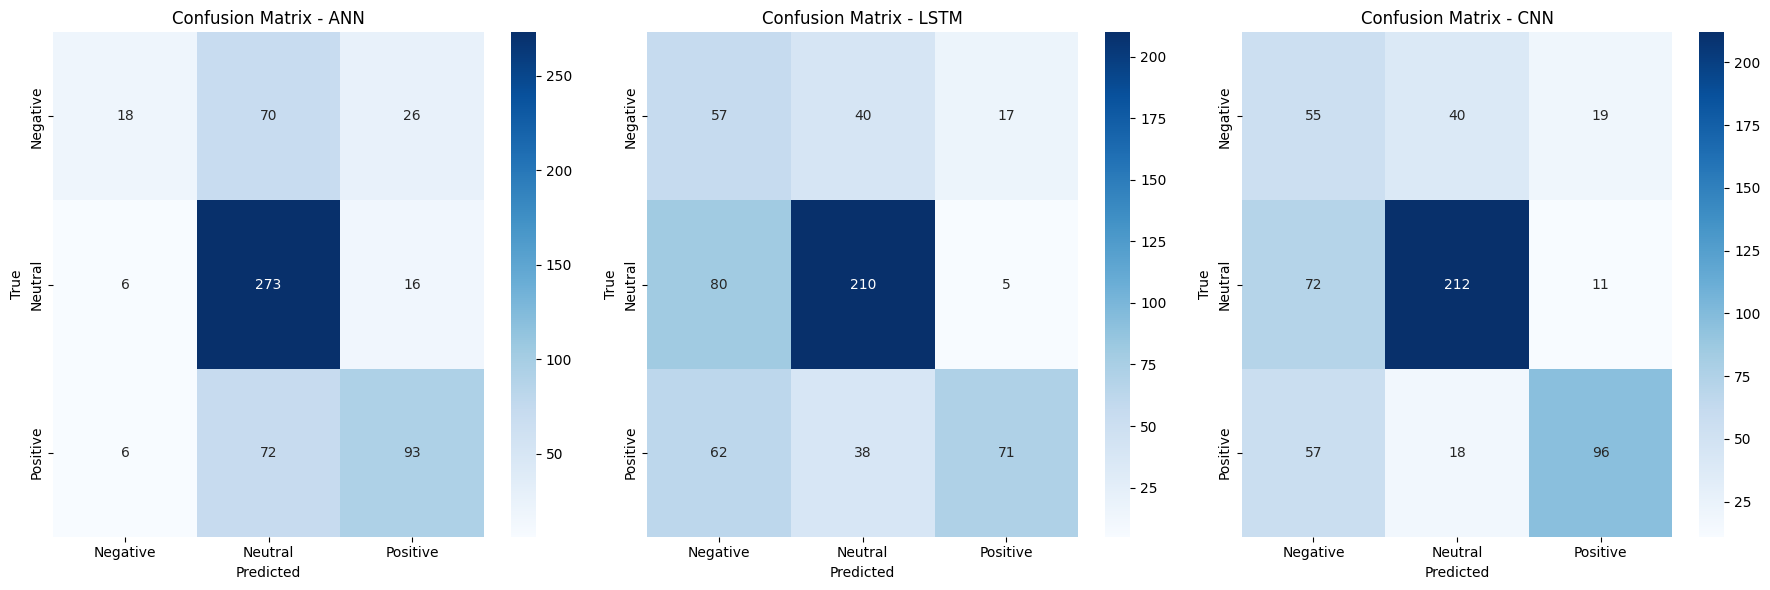

In [34]:
# Get predictions for all three models
y_pred_nn = model_nn.predict(X_test)
y_pred_lstm = model_lstm.predict(X_test)
y_pred_cnn = model.predict(X_test)

# Convert predictions to class labels
y_pred_nn_classes = np.argmax(y_pred_nn, axis=1)
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

# Convert true labels to class labels
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrices
cm_nn = confusion_matrix(y_true, y_pred_nn_classes)
cm_lstm = confusion_matrix(y_true, y_pred_lstm_classes)
cm_cnn = confusion_matrix(y_true, y_pred_cnn_classes)

# Plot confusion matrices for all three models
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_, ax=axes[0])
axes[0].set_title('Confusion Matrix - ANN')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_, ax=axes[1])
axes[1].set_title('Confusion Matrix - LSTM')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_, ax=axes[2])
axes[2].set_title('Confusion Matrix - CNN')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

plt.tight_layout()
plt.show()

In [35]:
# Print training data
print("Training Data:")
print(X_train)

# Print training labels
print("\nTraining Labels:")
print(y_train)

# Print testing data
print("\nTesting Data:")
print(X_test)

# Print testing labels
print("\nTesting Labels:")
print(y_test)


Training Data:
[[ 381 3011  163 ...    0    0    0]
 [  10  207  690 ...    0    0    0]
 [ 390    4    3 ...    0    0    0]
 ...
 [  21   61    2 ...    0    0    0]
 [  93  296   68 ...    0    0    0]
 [   3 2804 1192 ...    0    0    0]]

Training Labels:
[[False False  True]
 [False  True False]
 [False  True False]
 ...
 [False False  True]
 [False False  True]
 [ True False False]]

Testing Data:
[[   7    9 3755 ...    0    0    0]
 [ 125   97  107 ...   30    0    0]
 [   7    9    2 ...    0    0    0]
 ...
 [ 458 3892 3893 ...  798   11 2398]
 [ 908 1374   72 ...    0    0    0]
 [ 198  270    2 ...    0    0    0]]

Testing Labels:
[[False False  True]
 [ True False False]
 [False False  True]
 ...
 [ True False False]
 [ True False False]
 [False  True False]]


More analysis on each business tycoon